In [1]:
import requests

The query I typed into the search bar, which I re-created with the API:
"pierc* corporate veil)~50

AND ("?nc." OR "?orp." OR "?orporation" OR "?ncorporated")

1) I will look at cases that pertain to piercing the corporate veil.

Specifically, cases involving: 
1. a judicial decision regarding whether or not to pierce, 
2. in cases with a child corporation, and 
3. tort cases. 

In [30]:
query = "pierc* AND \"corporate veil\"~50 AND (parent OR (child OR subsidiar*)) AND *tort*"

2) I will look at cases from the **last 25 years.** 
    January 1, 1999, to January 1, 2024. 
    
**Justification?**
I want to normalize PCV holdings across several market cycles (recessions, booms) and presidential terms (differing policies).

3) I will look at precedential opinions.

In [19]:
url = "https://www.courtlistener.com/api/search?type=o&q=%22pierc*%20corporate%20veil%22~50&type=o&order_by=score%20desc&stat_Precedential=on&filed_after=01%2F01%2F1999&filed_before=01%2F01%2F2024"

Copy authorization token from courtlistener.com

In [8]:
token = 'e4995dec4d11248e5e027bce0f5de26d5ee741a8'

In [20]:
pcv_data = requests.get(url, headers={'Authorization':token})

In [21]:
pcv_data

<Response [200]>

In [25]:
pcv_json = pcv_data.json()

In [26]:
pcv_json

{'count': 57,
 'next': 'https://www.courtlistener.com/api/rest/v4/search/?cursor=cz0xMC40NzAyJnM9MTI4NDI1NSZ0PW8mZD0yMDI0LTEwLTAy&filed_after=01%2F01%2F1999&filed_before=01%2F01%2F2024&order_by=score+desc&q=%22pierc%2A+corporate+veil%22~50&stat_Precedential=on&type=o&type=o',
 'previous': None,
 'results': [{'absolute_url': '/opinion/7698110/we-got-games-llc-v-e-d-ventures-llc/',
   'attorney': 'Derrick Collins, Birmingham, for appellants., A. Todd Campbell and John C. Guin of Campbell Guin, LLC, Birmingham, for appellee.',
   'caseName': 'We Got Games, LLC v. E & D Ventures, LLC',
   'caseNameFull': 'WE GOT GAMES, LLC Bernard Buggs, individually and Bernard Buggs Investment Company v. E & D VENTURES, LLC',
   'citation': ['261 So. 3d 1224'],
   'citeCount': 0,
   'cluster_id': 7698110,
   'court': 'Court of Civil Appeals of Alabama',
   'court_citation_string': 'Ala. Civ. App.',
   'court_id': 'alacivapp',
   'dateArgued': None,
   'dateFiled': '2018-03-23',
   'dateReargued': None,
 

"citeCount" = the number of times THIS opinion has been cited in other opinions. 

In [29]:
pcv_json['results'][0]

{'absolute_url': '/opinion/7698110/we-got-games-llc-v-e-d-ventures-llc/',
 'attorney': 'Derrick Collins, Birmingham, for appellants., A. Todd Campbell and John C. Guin of Campbell Guin, LLC, Birmingham, for appellee.',
 'caseName': 'We Got Games, LLC v. E & D Ventures, LLC',
 'caseNameFull': 'WE GOT GAMES, LLC Bernard Buggs, individually and Bernard Buggs Investment Company v. E & D VENTURES, LLC',
 'citation': ['261 So. 3d 1224'],
 'citeCount': 0,
 'cluster_id': 7698110,
 'court': 'Court of Civil Appeals of Alabama',
 'court_citation_string': 'Ala. Civ. App.',
 'court_id': 'alacivapp',
 'dateArgued': None,
 'dateFiled': '2018-03-23',
 'dateReargued': None,
 'dateReargumentDenied': None,
 'docketNumber': '2160977',
 'docket_id': 64701020,
 'judge': 'Thomas',
 'lexisCite': '',
 'meta': {'timestamp': '2024-06-22T15:20:31.159935Z',
  'date_created': '2022-07-29T19:11:11.179651Z'},
 'neutralCite': '',
 'non_participating_judge_ids': [],
 'opinions': [{'author_id': None,
   'cites': [],
   

In [50]:
pcv_json.keys()

page_x_results = pcv_json['results'].copy()
len(page_x_results)

20

In [55]:
pcv_json['next'].split("&")[2]

'page=2'

In [56]:
while pcv_json['next']:
    print(pcv_json['next'].split("&")[2])
    url = pcv_json['next']
    pcv_data = requests.get(url)
    pcv_json = pcv_data.json()
    page_copy = pcv_json['results'].copy()
    page_x_results.extend(page_copy)

page=2
page=3
page=4
page=5
page=6
page=7
page=8
page=9
page=10
page=11
page=12
page=13
page=14
page=15
page=16
page=17
page=18
page=19
page=20
page=21
page=22
page=23
page=24
page=25
page=26
page=27
page=28
page=29
page=30
page=31
page=32
page=33
page=34
page=35
page=36
page=37
page=38
page=39
page=40
page=41
page=42
page=43
page=44
page=45
page=46
page=47
page=48
page=49
page=50
page=51
page=52
page=53
page=54
page=55
page=56
page=57
page=58
page=59
page=60
page=61
page=62
page=63
page=64
page=65
page=66
page=67
page=68
page=69
page=70
page=71
page=72
page=73
page=74
page=75
page=76
page=77
page=78
page=79
page=80
page=81
page=82
page=83
page=84
page=85
page=86
page=87
page=88
page=89
page=90
page=91
page=92
page=93
page=94
page=95
page=96
page=97
page=98
page=99
page=100
page=101
page=102
page=103
page=104
page=105
page=106
page=107
page=108
page=109
page=110
page=111
page=112
page=113
page=114
page=115
page=116
page=117
page=118
page=119
page=120
page=121
page=122
page=123
page=124

In [57]:
len(page_x_results)

2885

In [58]:
type(page_x_results)

list

In [59]:
type(page_x_results[0])

dict

In [61]:
pcv_json['results'] = page_x_results

In [62]:
len(pcv_json['results'])

2885

In [63]:
import pickle


In [64]:
with open('pcv.pickle', 'wb') as handle:
    pickle.dump(pcv_json, handle, pickle.HIGHEST_PROTOCOL)

result of 'curl -X OPTIONS "https://www.courtlistener.com/api/rest/v3/search/"

{
"name":"Search List",
"description":"",
"renders":["application/json","text/html","application/xml"],
"parses":["application/json","application/x-www-form-urlencoded","multipart/form-data","application/xml"]
}

the query I used:

curl -o pcv_13.json "https://www.courtlistener.com/api/rest/v3/search/?q=%22pierc*%20corporate%20veil%22~50&type=o&order_by=score%20desc&stat_Precedential=on&filed_after=09%2F29%2F2013"

In [66]:
import pandas as pd

In [71]:
pcv_dict = pd.read_pickle('pcv.pickle')

In [72]:
pcv_df = pd.DataFrame.from_dict(pcv_dict)

In [78]:
pcv_df.results.head()[0]

{'absolute_url': '/opinion/3192066/matter-of-agai-v-diontech-consulting-inc/',
 'attorney': '',
 'author_id': None,
 'caseName': 'Matter of Agai v. Diontech Consulting, Inc.',
 'caseNameShort': '',
 'citation': ['138 A.D.3d 736', '29 N.Y.S.3d 441'],
 'citeCount': 0,
 'cites': None,
 'cluster_id': 3192066,
 'court': 'Appellate Division of the Supreme Court of the State of New York',
 'court_citation_string': 'N.Y. App. Div.',
 'court_exact': 'nyappdiv',
 'court_id': 'nyappdiv',
 'dateArgued': None,
 'dateFiled': '2016-04-06T00:00:00-07:00',
 'dateReargued': None,
 'dateReargumentDenied': None,
 'docketNumber': '2013-10303',
 'docket_id': 3051409,
 'download_url': 'http://www.courts.state.ny.us/reporter/3dseries/2016/2016_02646.htm',
 'id': 3191961,
 'joined_by_ids': None,
 'judge': 'Mastro, Hall, Miller, Lasalle',
 'lexisCite': None,
 'local_path': None,
 'neutralCite': None,
 'non_participating_judge_ids': None,
 'pagerank': None,
 'panel_ids': None,
 'per_curiam': None,
 'scdb_id': ''

In [101]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
cites_list = []

In [116]:
for row in pcv_df.results:
    if row['cites']:
        cites_list.append(len(row['cites']))
    else:
        cites_list.append(0)

In [117]:
len(cites_list)

2885

In [118]:
from collections import Counter

In [144]:
cites_list[0:10]

[0, 4, 4, 11, 0, 0, 3, 0, 0, 0]

In [141]:
cites_df = pd.DataFrame(cites_list, columns=['cites'])

In [142]:
# this describe the distribution of 'cites' across the PCV cases
cites_df.describe()

,cites
count,2885.000000
mean,10.802426
std,41.979923
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,963.000000


In [120]:
num_cites = Counter(cites_list)

In [122]:
num_cites_dict = dict(num_cites)

res = {key: val for key, val in sorted(num_cites_dict.items(), key = lambda ele: ele[0])}

In [131]:
cites = pd.DataFrame.from_dict(res, orient='index')

In [132]:
cites.head()

,0
0,1222
1,94
2,70
3,143
4,82


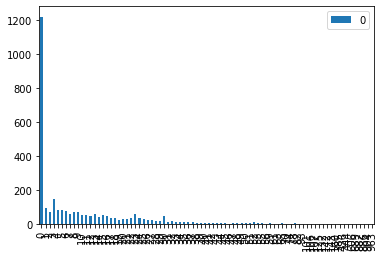

In [133]:
cites.plot(kind='bar')

See the "next" and the page # to determine which page # you're on, and how many results you still have to go -- use the "count" field to double-check. 